

### Данные

Исходные данные для статьи [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/) находятся в свободном доступе по следующей ссылке на github: https://github.com/fivethirtyeight/data. Это два csv-файла. В одном файле данные о рейтингах от компании Fandango, а в другом файле агрегированные данные о рейтингах от других компаний, таких как Metacritic, IMDB и Rotten Tomatoes.

#### all_sites_scores.csv

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
fandango = pd.read_csv("fandango_scrape.csv")

In [3]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [4]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [5]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


<Axes: xlabel='RATING', ylabel='VOTES'>

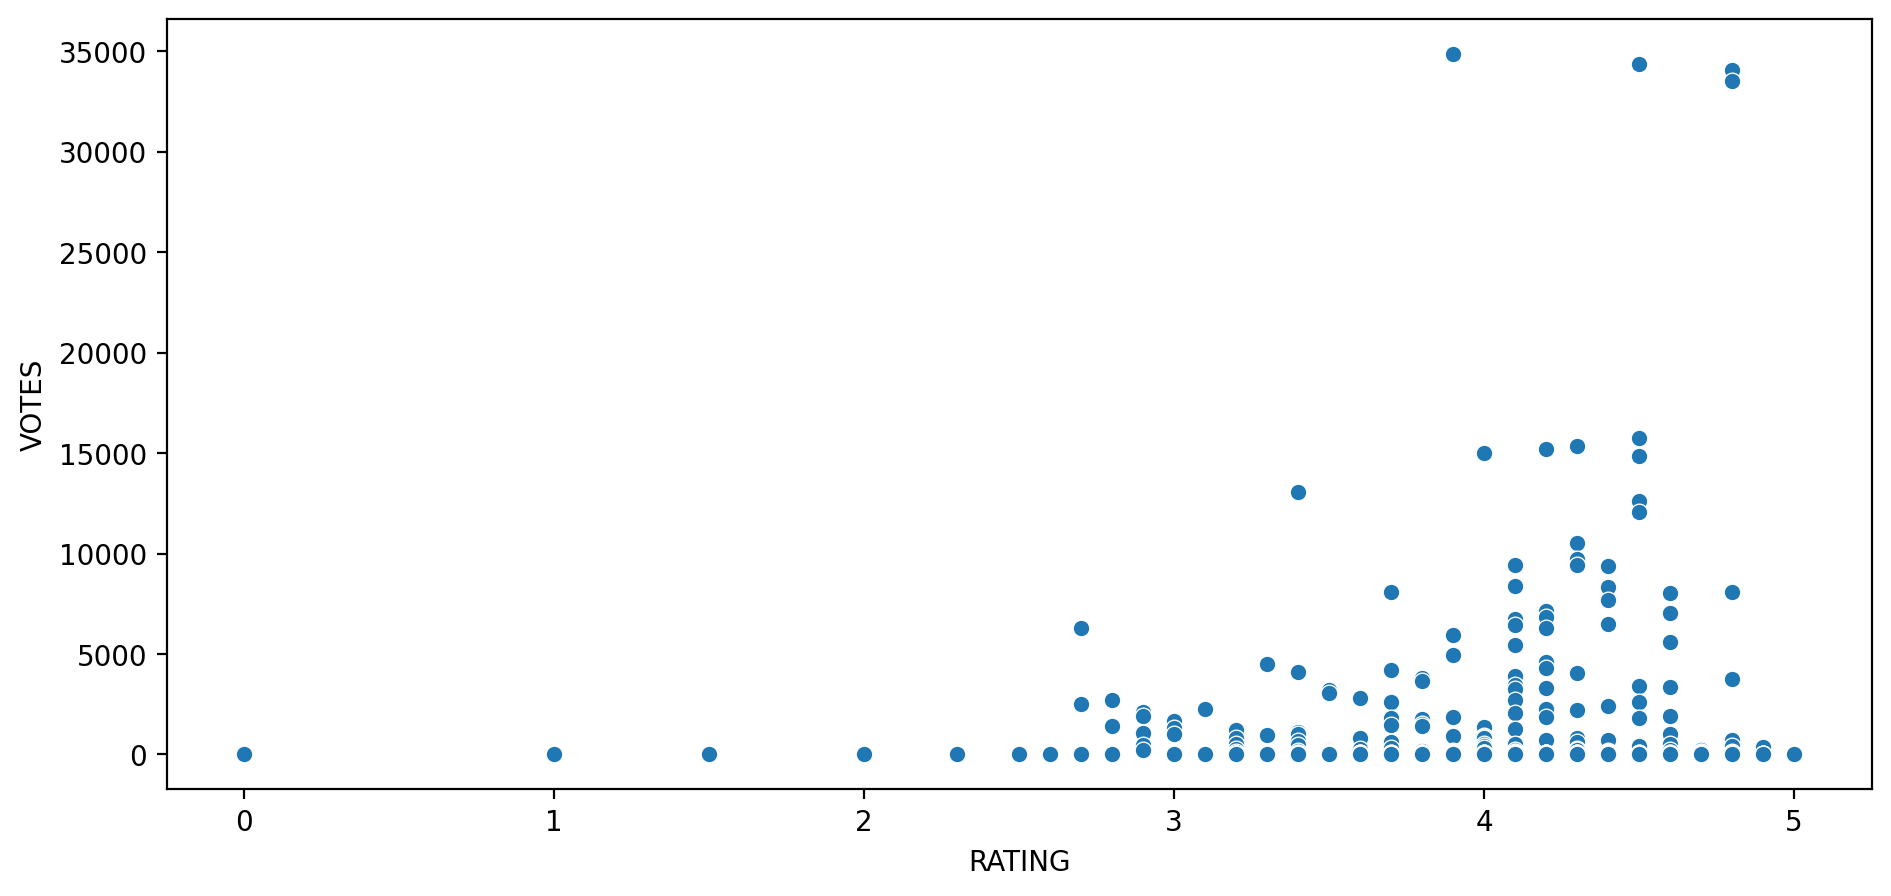

In [6]:
plt.figure(figsize=(11,5), dpi=200)
sns.scatterplot(data=fandango, x='RATING', y='VOTES')


In [7]:
fandango.corr(numeric_only=True)

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [8]:
#fandango['YEARS'] = fandango['FILM'].str.split().str[-1]
fandango['YEARS'] = fandango['FILM'].str.split().str[-1].str.replace('(','',regex=True).str.replace(')','',regex=True)

In [9]:
fandango['YEARS'].value_counts()


2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEARS, dtype: int64

<Axes: xlabel='YEARS', ylabel='count'>

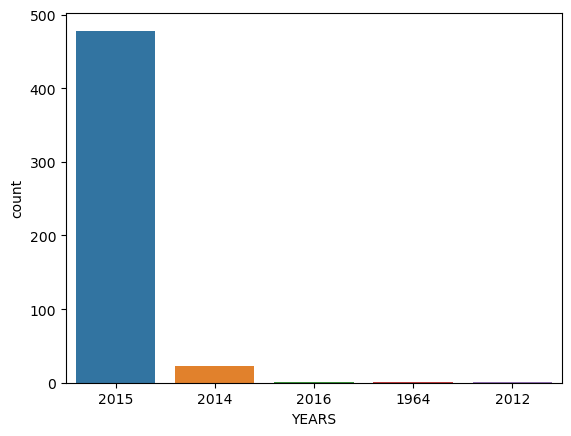

In [10]:
#plt.figure(figsize=(10,2), dpi = 200)
sns.countplot(data=fandango, x='YEARS')


In [11]:
fandango.head(10)

,FILM,STARS,RATING,VOTES,YEARS
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [12]:
fandango[fandango['VOTES'] == 0].count()

FILM      69
STARS     69
RATING    69
VOTES     69
YEARS     69
dtype: int64

In [13]:
df = fandango[fandango['VOTES'] != 0]
df

,FILM,STARS,RATING,VOTES,YEARS
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


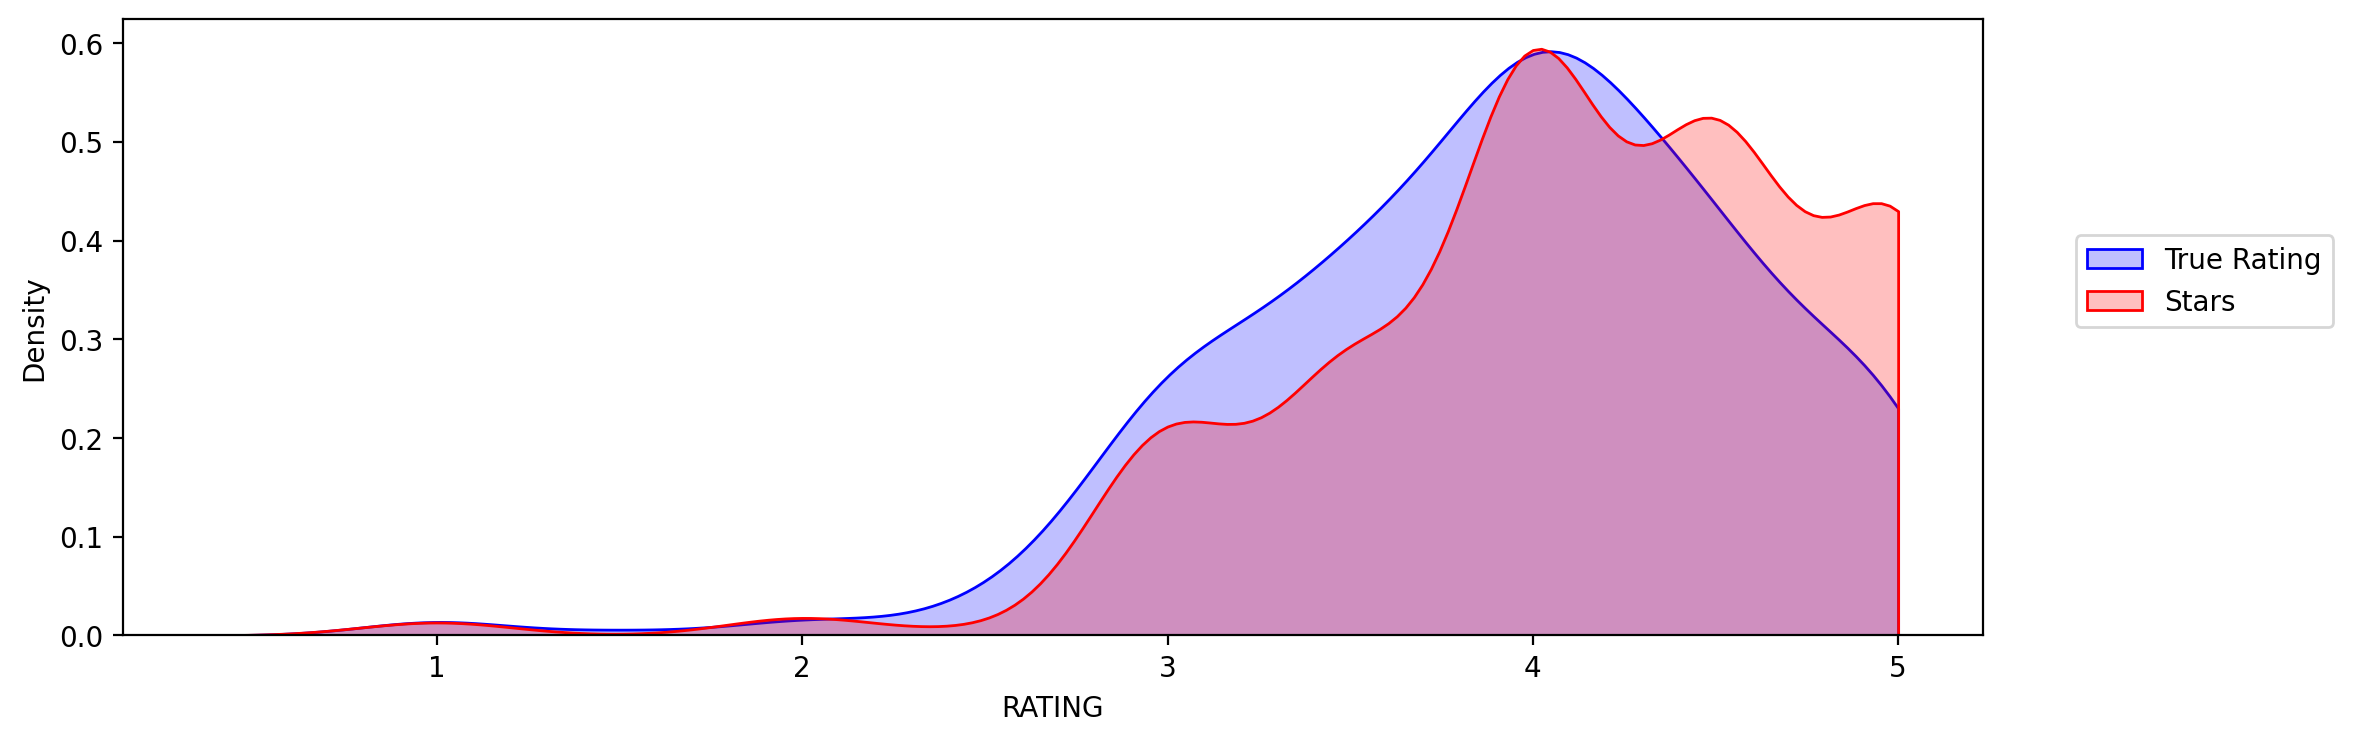

In [14]:
plt.figure(figsize=(12,4), dpi =200)
sns.kdeplot(data=df, x = 'RATING', clip=(0,5), color='blue',fill=True, label='True Rating')
sns.kdeplot(data=df, x = 'STARS', clip=(0,5), color='red',fill=True,label='Stars')

plt.legend(loc=(1.05,0.5))

In [15]:
df['STARS_DIFF'] = round((df['STARS'] - df['RATING']),2)
df

C:\Users\User\AppData\Local\Temp\ipykernel_7028\3411134177.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['STARS_DIFF'] = round((df['STARS'] - df['RATING']),2)


,FILM,STARS,RATING,VOTES,YEARS,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


<Axes: xlabel='STARS_DIFF', ylabel='count'>

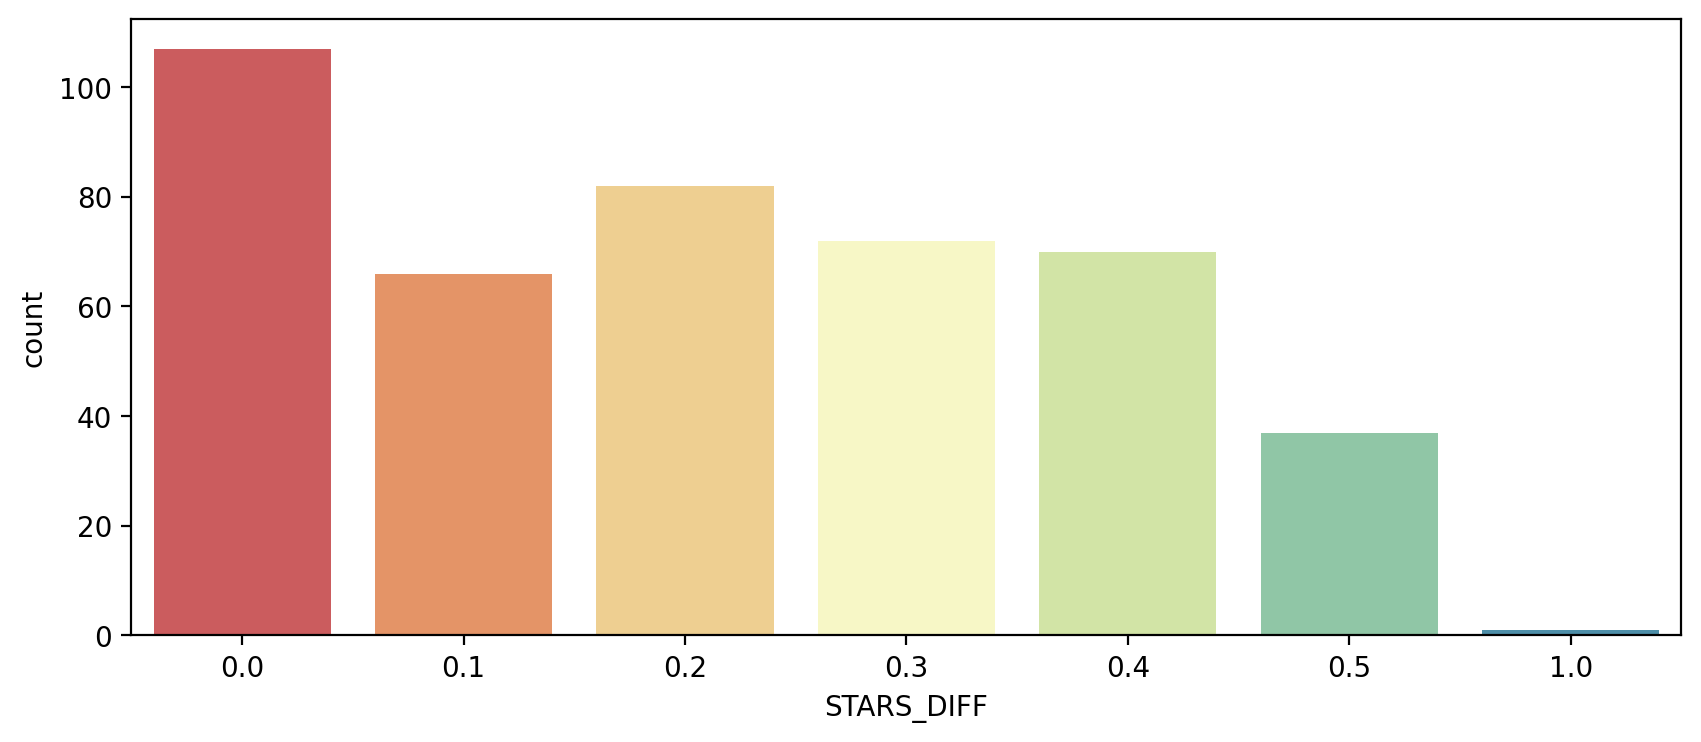

In [16]:
plt.figure(figsize=(10,4), dpi=200)
sns.countplot(data=df, x='STARS_DIFF', palette ='Spectral')


In [17]:
df[df['STARS_DIFF'] == 1]


,FILM,STARS,RATING,VOTES,YEARS,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


In [18]:
all_sites = pd.read_csv("all_sites_scores.csv")

In [19]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [20]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [21]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


<Axes: xlabel='RottenTomatoes', ylabel='RottenTomatoes_User'>

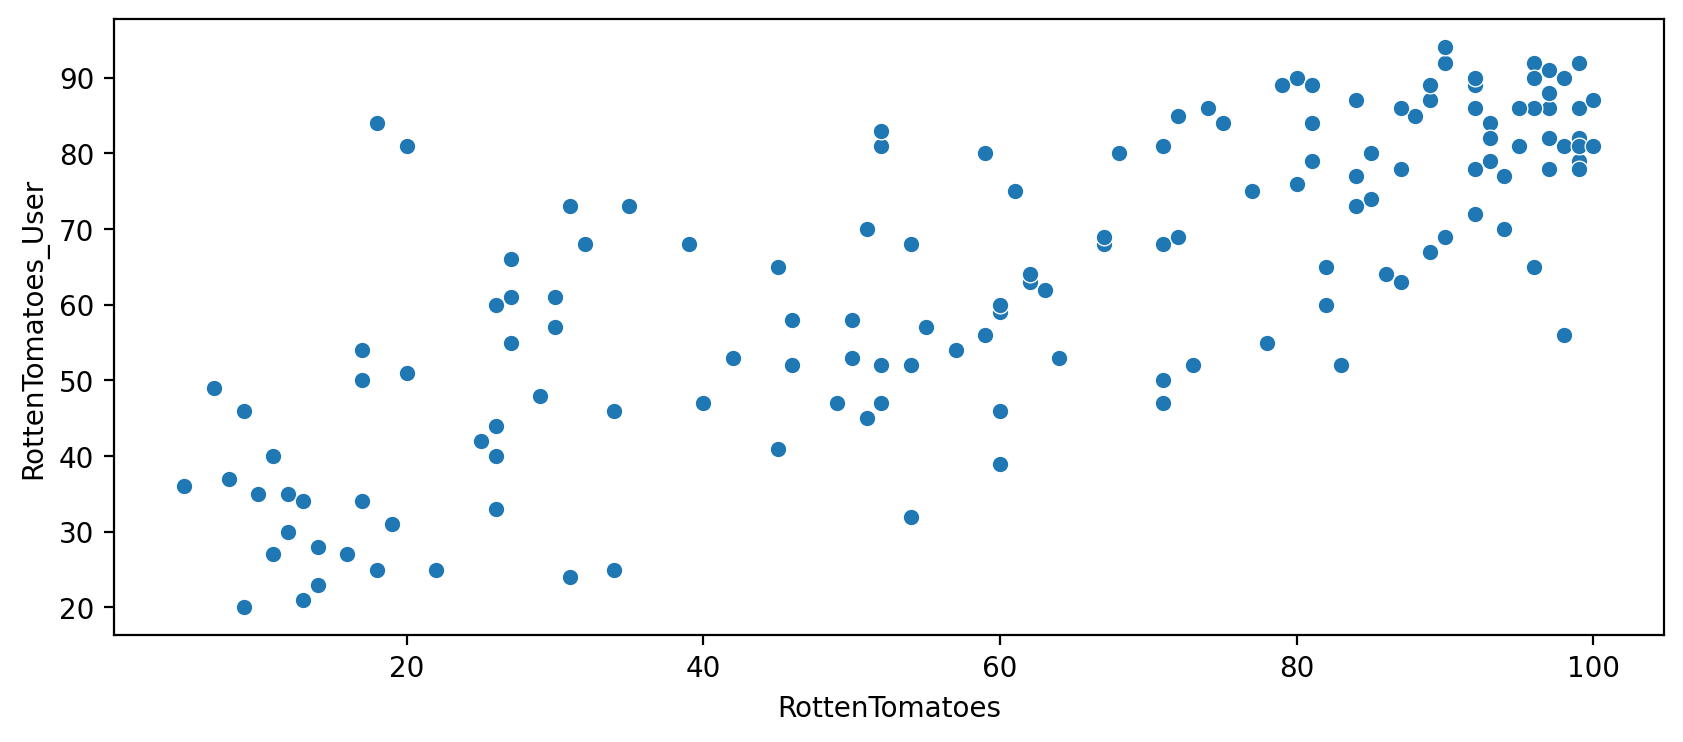

In [22]:
plt.figure(figsize=(10,4), dpi=200)
sns.scatterplot(data=all_sites, x='RottenTomatoes', y='RottenTomatoes_User')


In [23]:
all_sites['RT_DIFF'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']
all_sites

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_DIFF
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14
...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367,9
142,'71 (2015),97,82,83,7.5,7.2,60,24116,15
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345,19
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955,19


In [24]:
all_sites['RT_DIFF'].abs().mean()


15.095890410958905

<Axes: xlabel='RT_DIFF', ylabel='Count'>

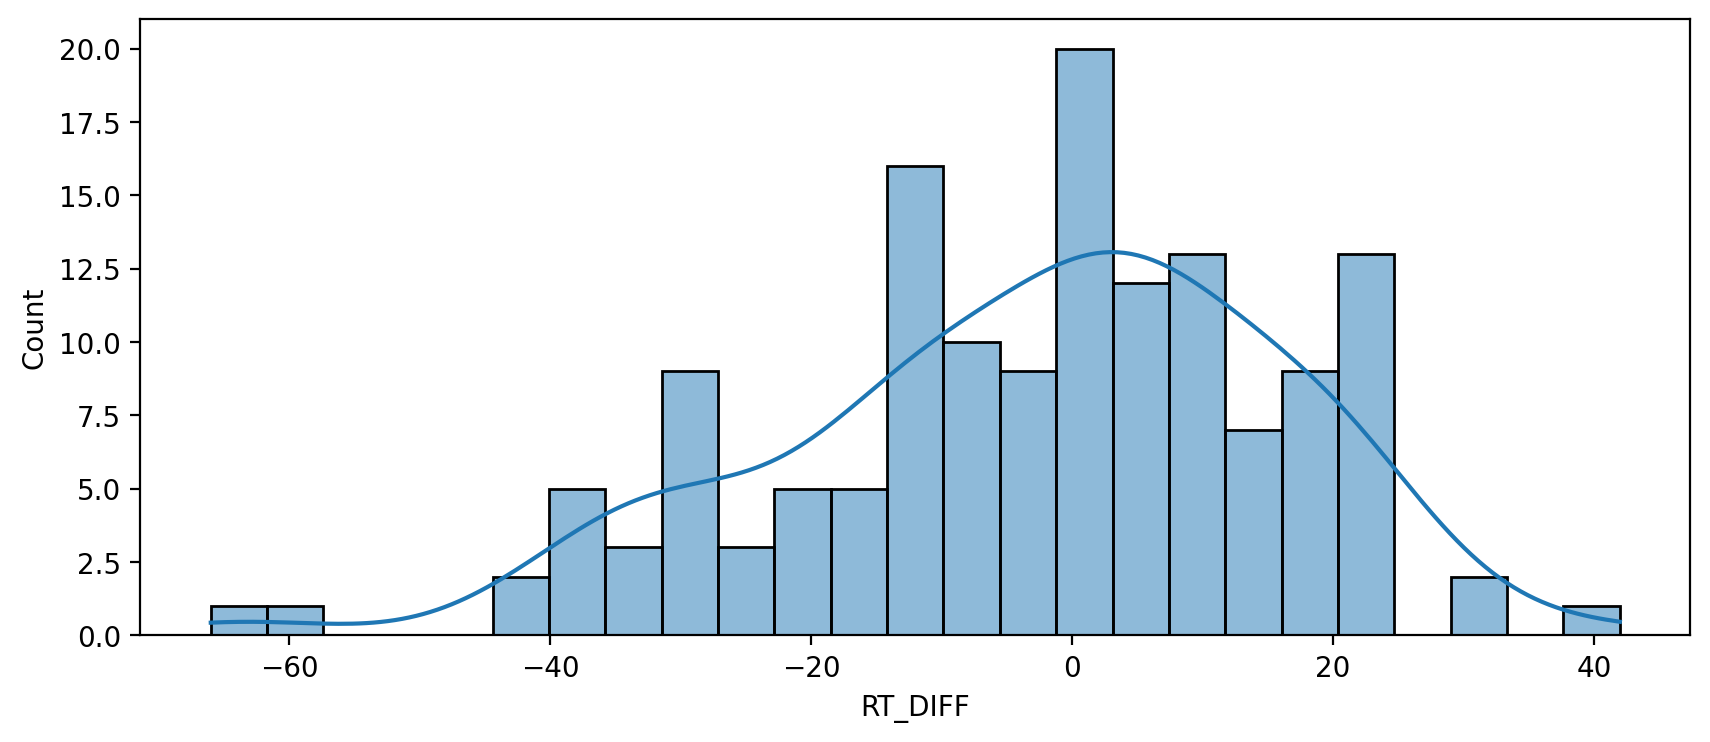

In [25]:
plt.figure(figsize=(10,4), dpi=200)
sns.histplot(data=all_sites, x='RT_DIFF', kde=True,bins=25)


<Axes: xlabel='RT_DIFF', ylabel='Count'>

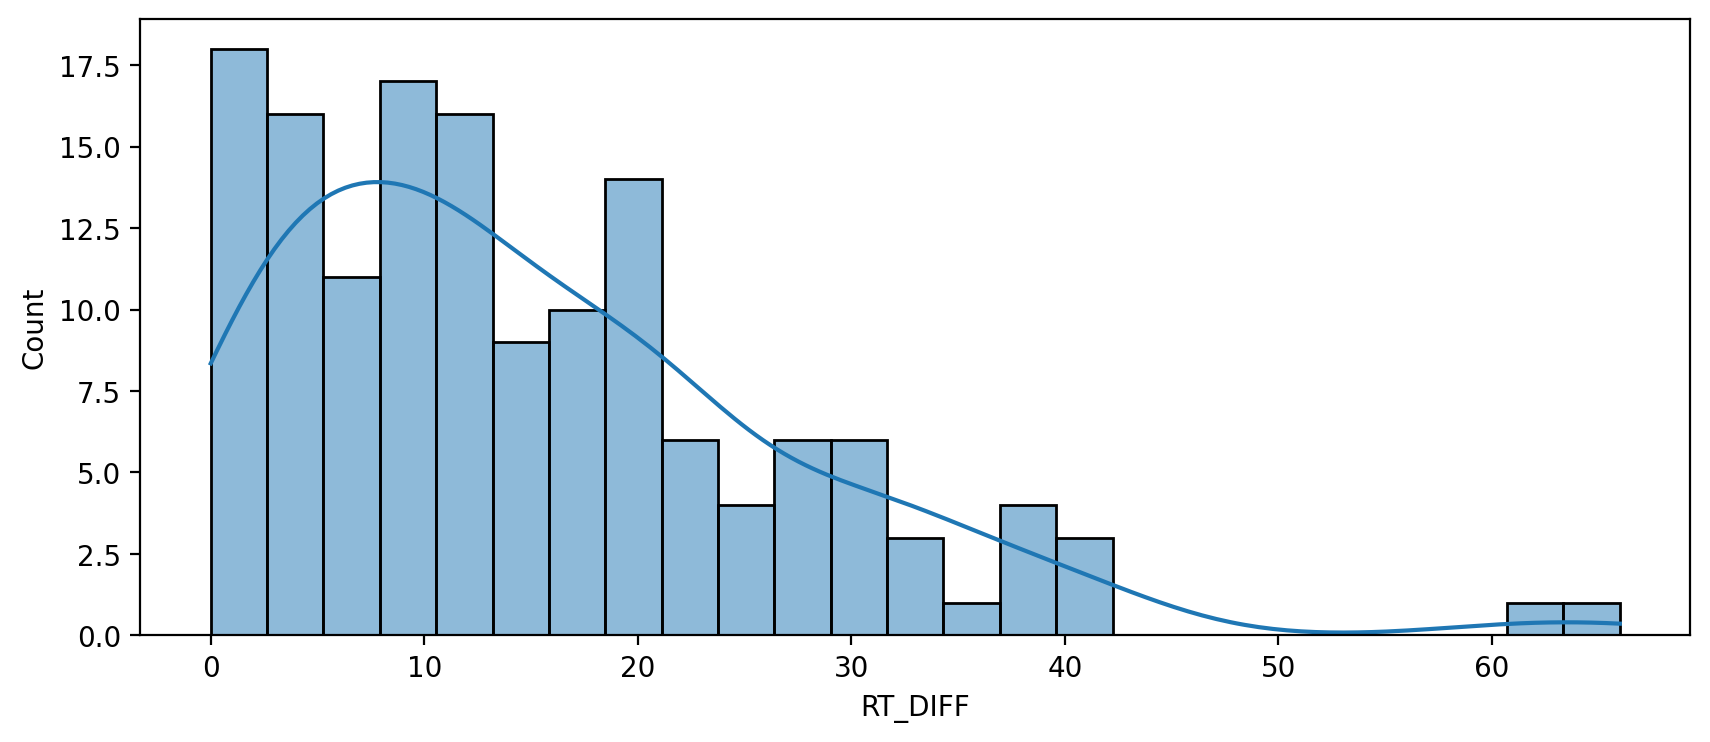

In [26]:
plt.figure(figsize=(10,4), dpi =200)
sns.histplot(data=all_sites, x=all_sites['RT_DIFF'].abs(), bins=25, kde=True)


In [27]:
all_sites[['FILM', 'RT_DIFF']].sort_values('RT_DIFF').head()

,FILM,RT_DIFF
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
134,The Longest Ride (2015),-42
105,Hitman: Agent 47 (2015),-42
125,The Wedding Ringer (2015),-39


In [28]:
all_sites[['FILM', 'RT_DIFF']].sort_values('RT_DIFF',ascending=False).head()


,FILM,RT_DIFF
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
145,"Kumiko, The Treasure Hunter (2015)",24
37,Welcome to Me (2015),24


<Axes: xlabel='Metacritic', ylabel='Metacritic_User'>

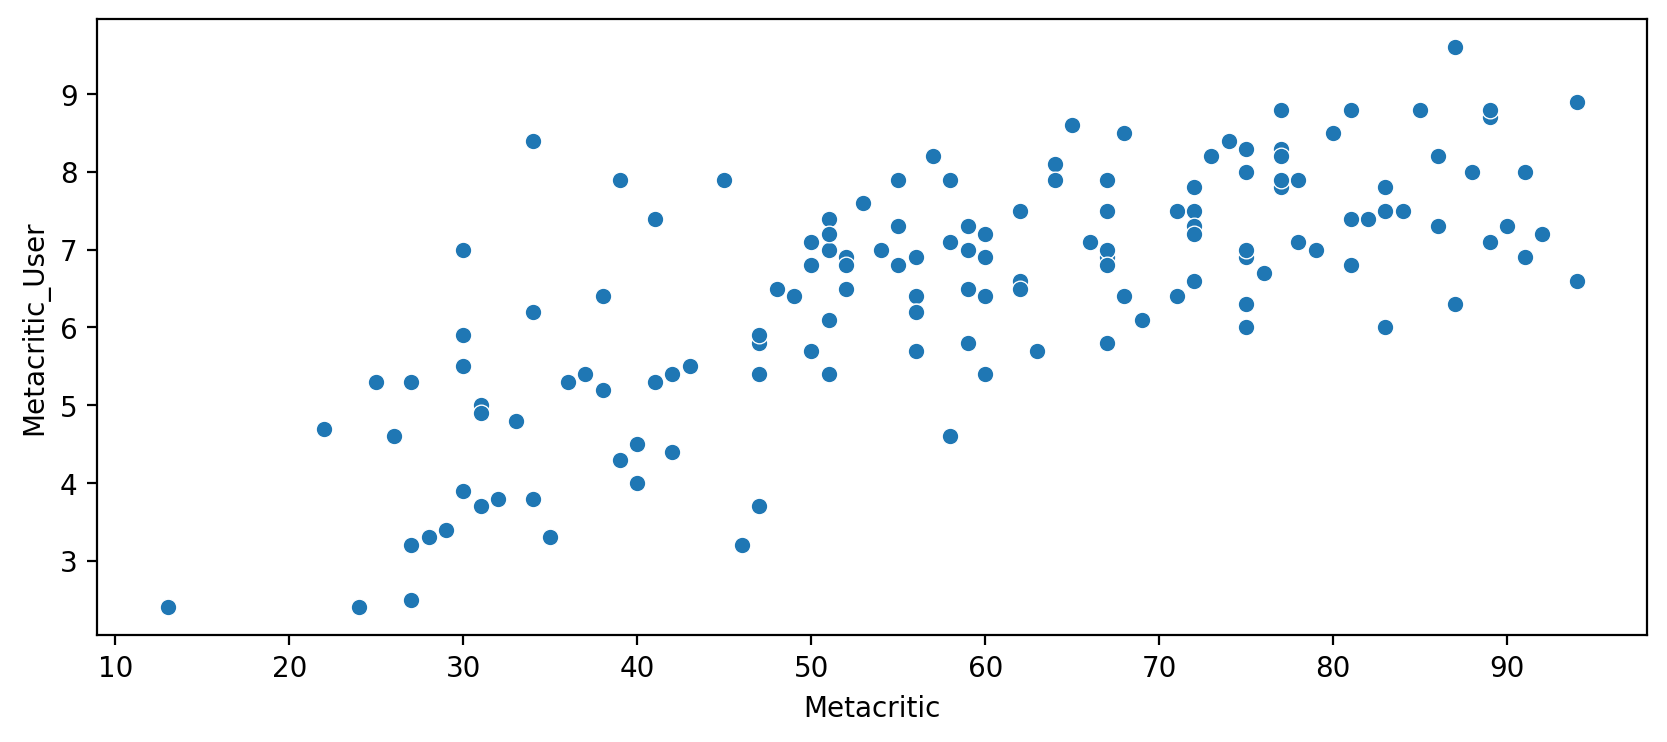

In [29]:
plt.figure(figsize=(10,4), dpi=200)
sns.scatterplot(data=all_sites, x='Metacritic', y='Metacritic_User')


<Axes: xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

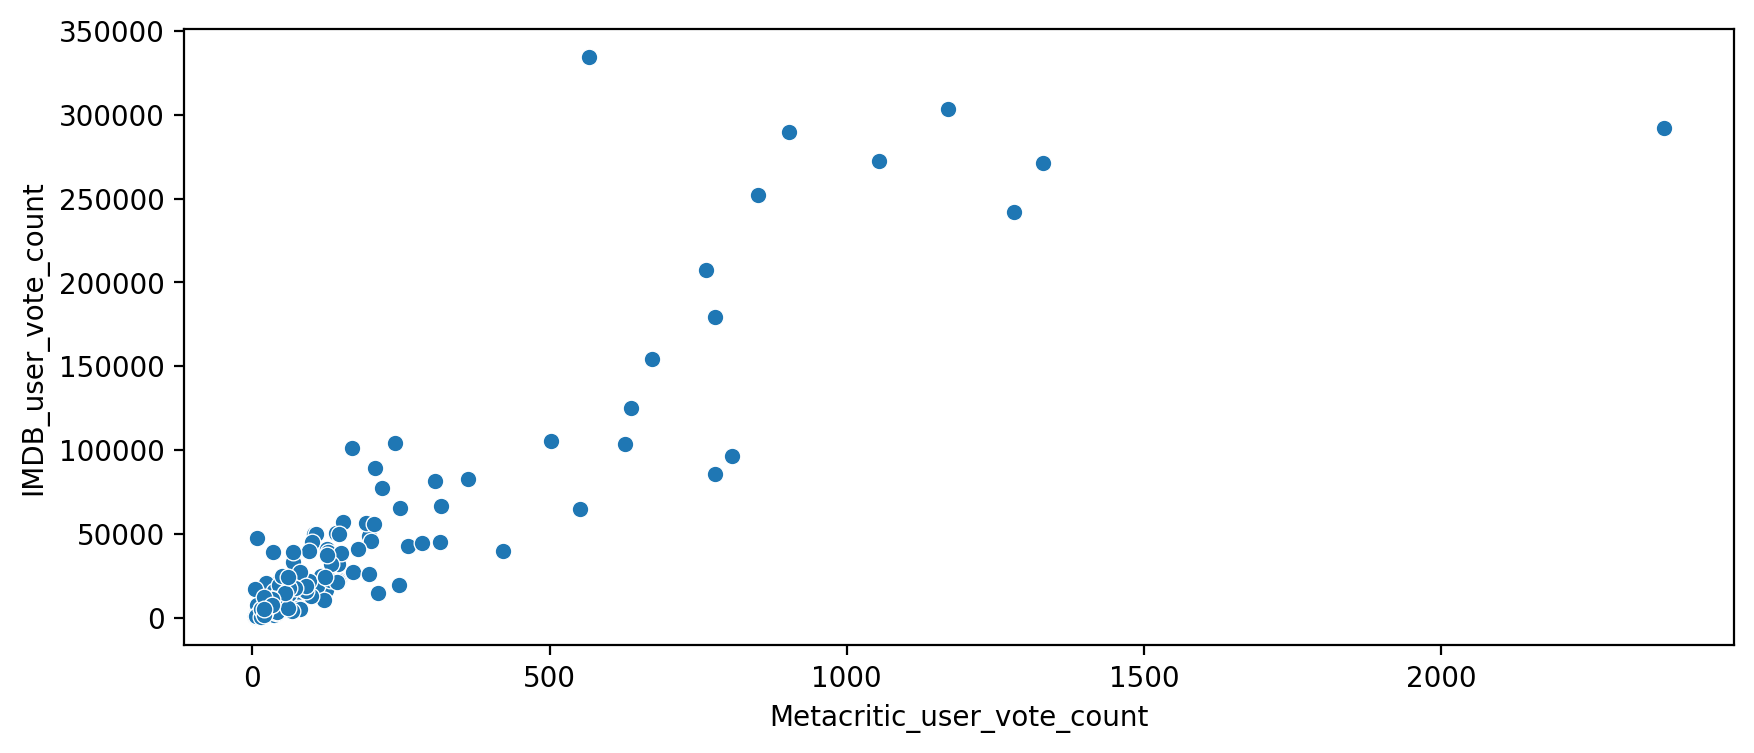

In [30]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=all_sites, x='Metacritic_user_vote_count', y='IMDB_user_vote_count')


In [31]:
all_sites.sort_values(['IMDB_user_vote_count'],ascending=False).head(1)


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_DIFF
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


In [32]:
all_sites.sort_values(['Metacritic_user_vote_count'],ascending=False).head(1)


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_DIFF
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


In [35]:
all_df = pd.merge(fandango,all_sites,how='inner',on='FILM')
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEARS                       145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  RT_DIFF                     145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


In [36]:
all_df

,FILM,STARS,RATING,VOTES,YEARS,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015,87,63,68,6.4,6.7,19,5289,24
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015,95,81,87,6.3,7.0,18,1107,14
142,The Wrecking Crew (2015),4.5,4.2,38,2015,93,84,67,7.0,7.8,4,732,9
143,Tangerine (2015),4.0,3.9,36,2015,95,86,86,7.3,7.4,14,696,9


In [37]:
all_df['RT_Norm'] = all_df['RottenTomatoes'] / 20
all_df['RTU_Norm'] = all_df['RottenTomatoes_User'] / 20
all_df['Meta_Norm'] = all_df['Metacritic'] / 20
all_df['Meta_U_Norm'] = all_df["Metacritic_User"] / 2
all_df['IMDB_Norm'] = all_df["IMDB"] / 2
all_df.head()

,FILM,STARS,RATING,VOTES,YEARS,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_DIFF,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.25,2.10,2.30,1.60,2.10
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.55,4.05,2.95,3.50,3.65
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.60,4.25,3.60,3.30,3.70
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.05,4.20,3.35,3.40,3.70
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.90,4.50,4.70,4.45,4.30


In [38]:
norm_scores = all_df[['STARS','RATING','RT_Norm','RTU_Norm', 'Meta_Norm', 'Meta_U_Norm', 'IMDB_Norm']]
norm_scores.head()

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.25,2.10,2.30,1.60,2.10
1,4.5,4.5,3.55,4.05,2.95,3.50,3.65
2,5.0,4.8,3.60,4.25,3.60,3.30,3.70
3,5.0,4.8,4.05,4.20,3.35,3.40,3.70
4,4.5,4.5,4.90,4.50,4.70,4.45,4.30


<Axes: ylabel='Density'>

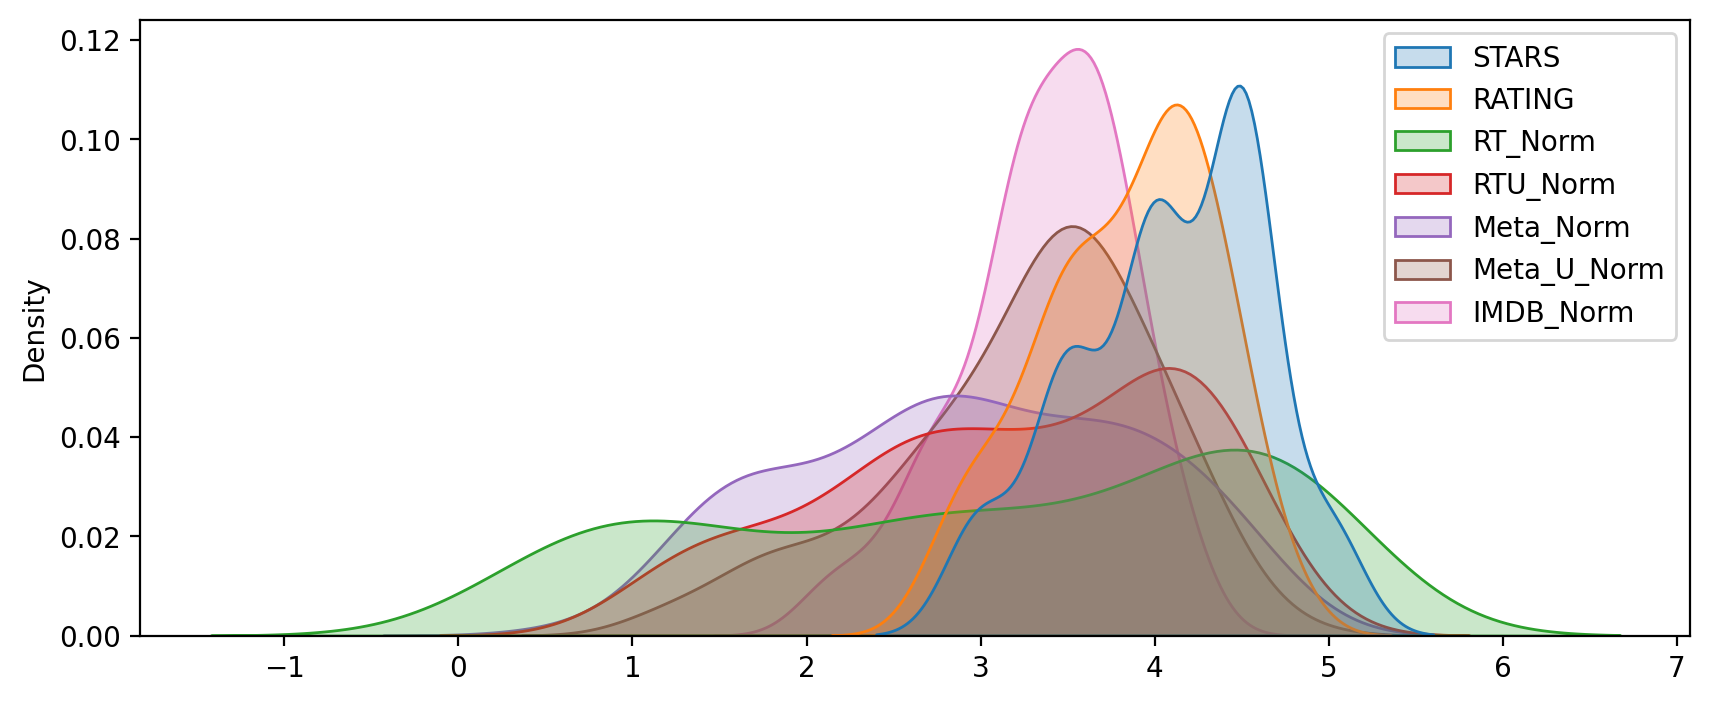

In [39]:
plt.figure(figsize=(10,4), dpi=200)
sns.kdeplot(data=norm_scores, fill=True)
#plt.legend(loc=(1.05,0.5))


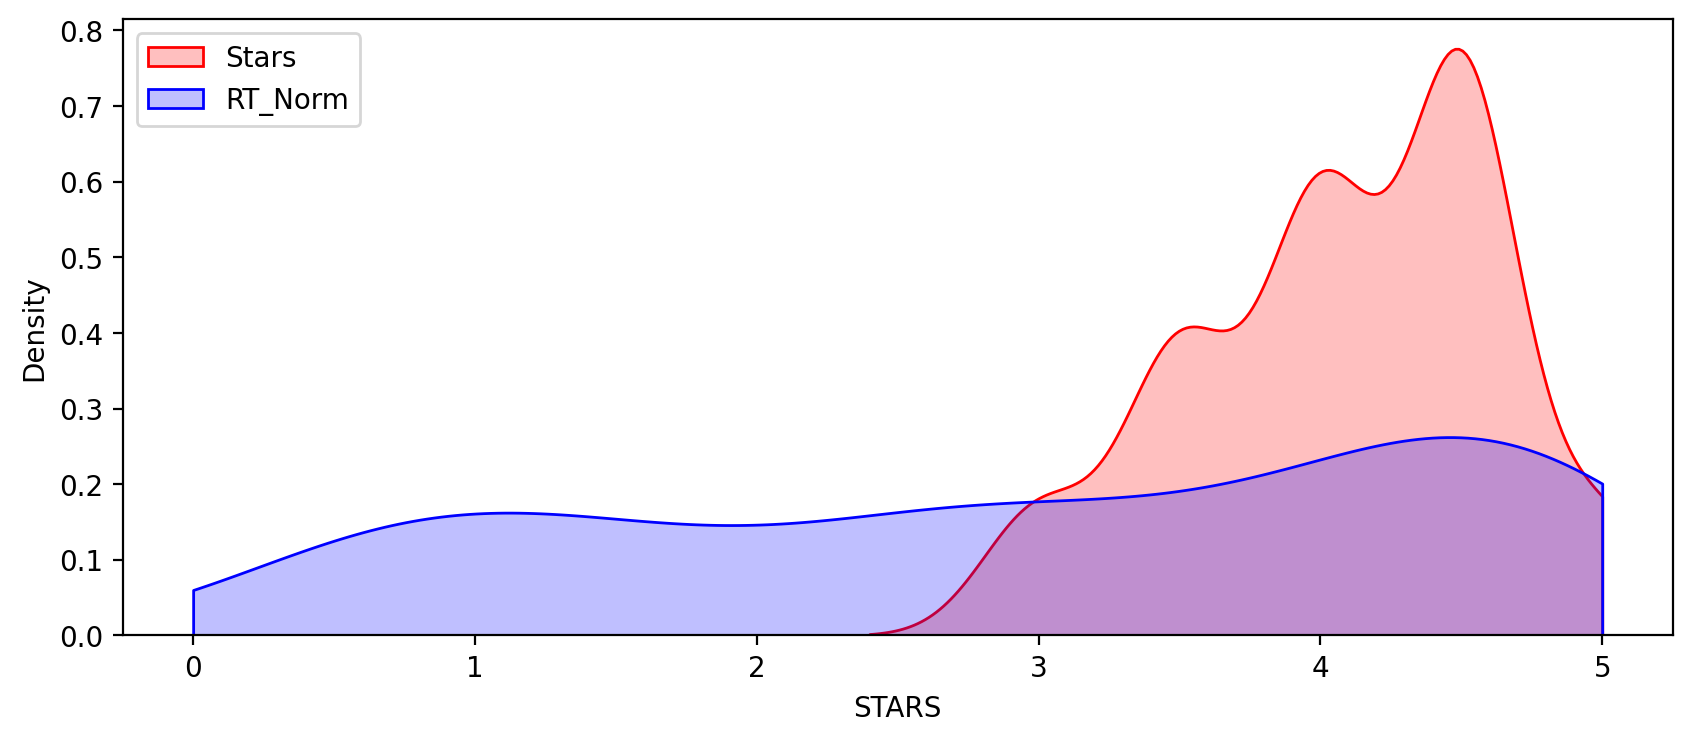

In [40]:
plt.figure(figsize=(10,4), dpi=200)
sns.kdeplot(data=norm_scores, x = 'STARS', fill=True, color='Red', label='Stars', clip=(0,5))
sns.kdeplot(data=norm_scores, x = 'RT_Norm', fill=True, color='Blue', label='RT_Norm', clip=(0,5))
plt.legend(loc='upper left')

<Axes: ylabel='Count'>

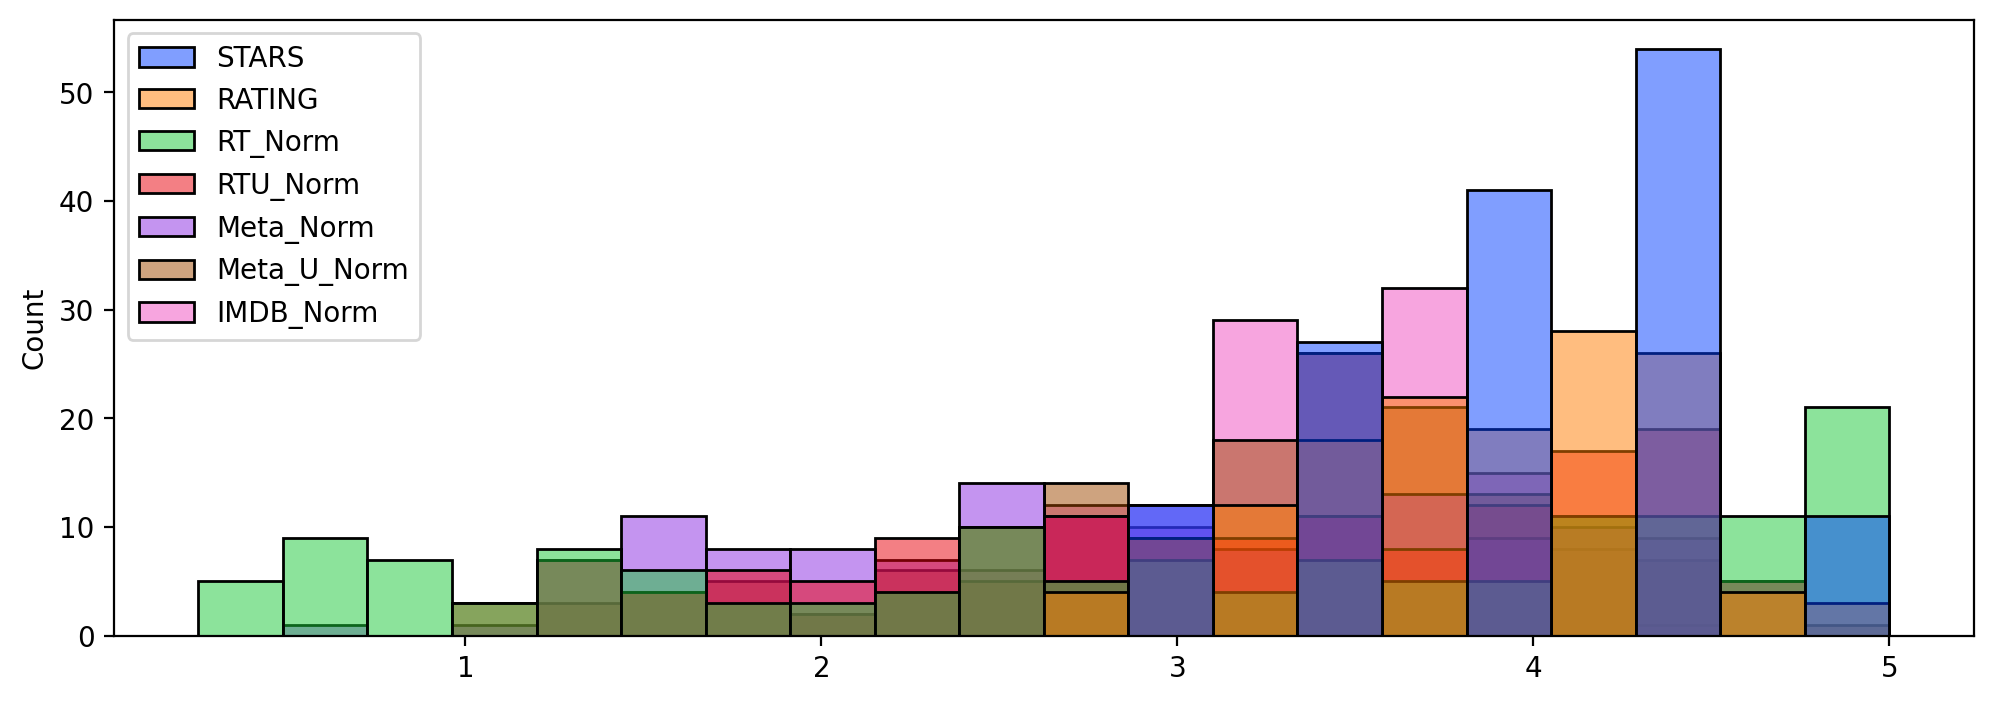

In [41]:
plt.figure(figsize=(12,4), dpi=200)
sns.histplot(data=norm_scores, palette='bright')


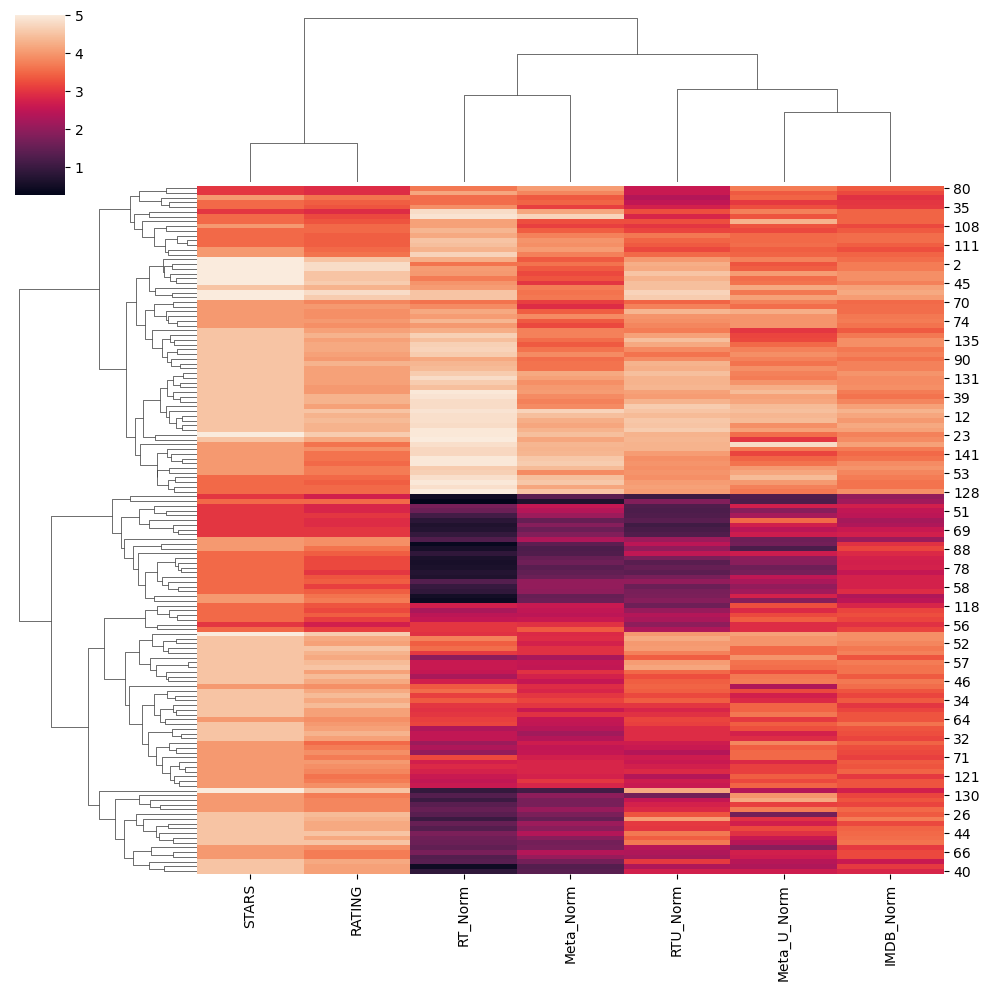

In [42]:
sns.clustermap(data=norm_scores)


In [43]:
norm_scores.sort_values(['RT_Norm'],ascending=True).head(10)

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
49,3.5,3.5,0.25,1.80,0.65,1.20,2.15
84,4.0,3.9,0.35,2.45,1.40,1.65,2.95
54,4.0,3.7,0.40,1.85,1.55,1.85,2.45
25,4.5,4.1,0.45,2.30,1.30,2.30,3.05
28,3.0,2.7,0.45,1.00,1.35,1.25,2.00
50,4.0,3.6,0.50,1.75,1.50,2.75,2.30
88,4.0,3.6,0.55,2.00,1.20,1.20,3.15
87,3.5,3.2,0.55,1.35,1.60,1.90,2.70
78,3.5,3.2,0.60,1.50,1.35,1.60,2.75
77,3.5,3.2,0.60,1.75,1.50,1.95,2.75


<Axes: ylabel='Density'>

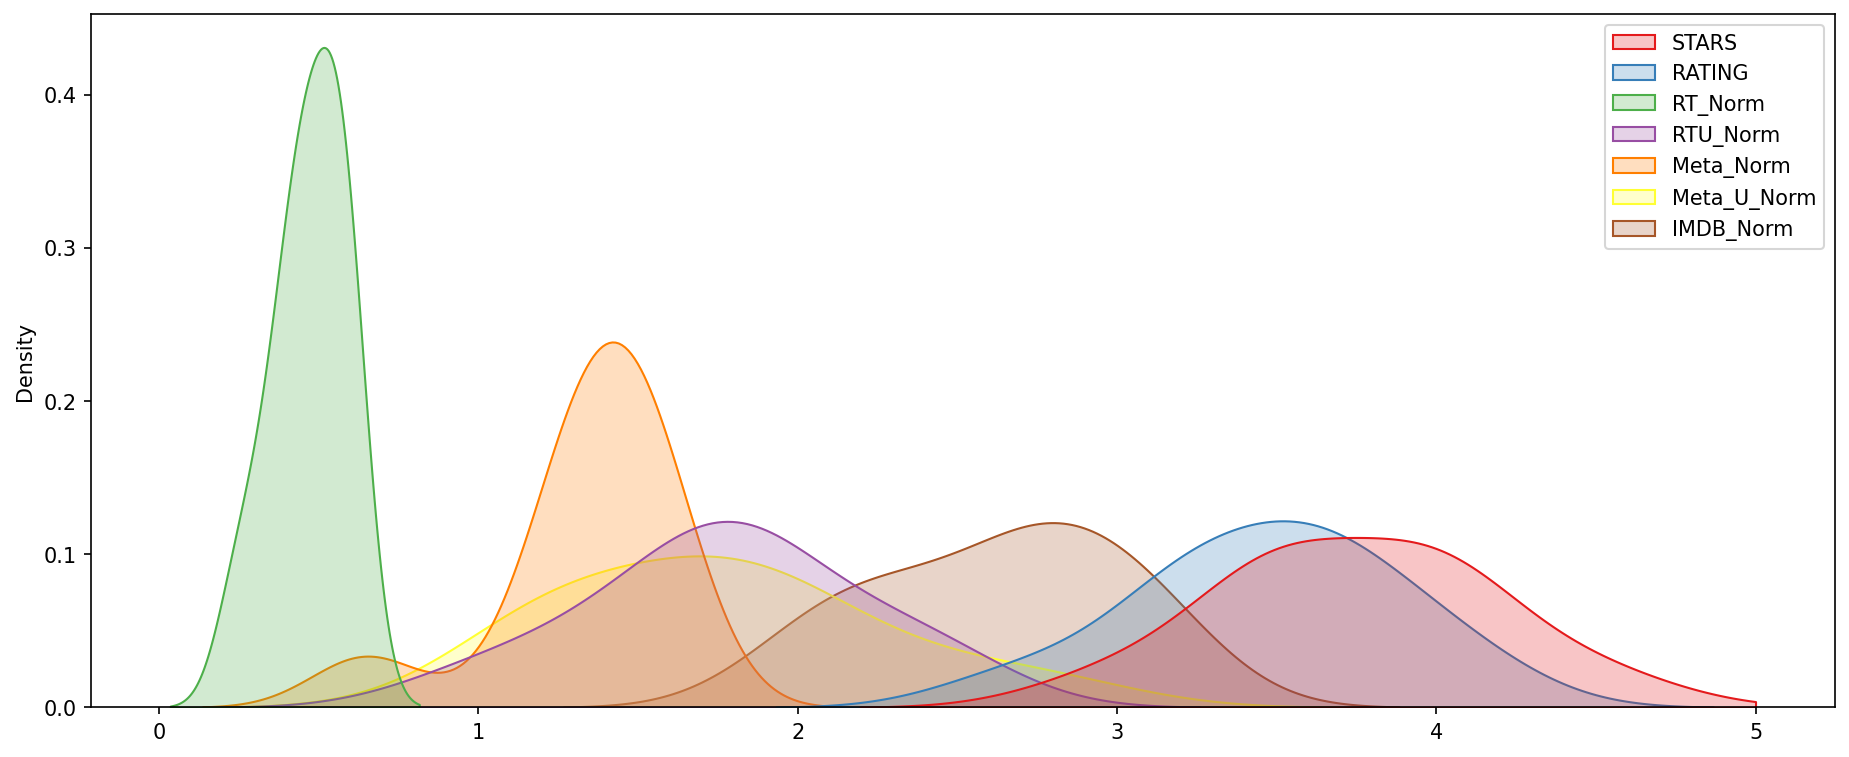

In [44]:
plt.figure(figsize=(15,6),dpi=150)
worst_films = norm_scores.sort_values(['RT_Norm'],ascending=True).head(10)
sns.kdeplot(data=worst_films,clip=[0,5],fill=True,palette='Set1')


  
**Выводы:Fandango показывал 3-4 звезды для фильмов, которые явно были неудачными!**  
    
**Больше всего отличается фильм [Taken 3!] - Fandango дал ему рейтинг 4.5 звёзд, хотя этот фильм получил [средний рейтинг 1.86] от других компаний!**

In [46]:
norm_scores.iloc[25]

STARS          4.50
RATING         4.10
RT_Norm        0.45
RTU_Norm       2.30
Meta_Norm      1.30
Meta_U_Norm    2.30
IMDB_Norm      3.05
Name: 25, dtype: float64

In [47]:
0.4+2.3+1.3+2.3+3

9.3

In [48]:
9.3/5

1.86